In [7]:
import pandas as pd
from google.colab import files

uploaded =files.upload()

data=pd.read_csv('Energy Meter.csv')

Saving Energy Meter.csv to Energy Meter.csv


In [8]:
#summarizing the dataset

print(data.shape)

(400, 4)


In [9]:
print(data.head(20))

    Voltage  Current  Power   Class
0    0.0000      0.0    0.0  NoLoad
1    0.0000      0.0    0.0  NoLoad
2    0.0000      0.0    0.0  NoLoad
3    0.0000      0.0    0.0  NoLoad
4    0.0000      0.0    0.0  NoLoad
5    0.0000      0.0    0.0  NoLoad
6    0.0000      0.0    0.0  NoLoad
7    0.3833      0.0    0.0  NoLoad
8    0.0000      0.0    0.0  NoLoad
9    0.0000      0.0    0.0  NoLoad
10   0.0000      0.0    0.0  NoLoad
11   0.0000      0.0    0.0  NoLoad
12   0.0000      0.0    0.0  NoLoad
13   0.0000      0.0    0.0  NoLoad
14   0.0000      0.0    0.0  NoLoad
15   0.0000      0.0    0.0  NoLoad
16   0.0000      0.0    0.0  NoLoad
17   0.0000      0.0    0.0  NoLoad
18   0.0000      0.0    0.0  NoLoad
19   0.0000      0.0    0.0  NoLoad


In [10]:
print(data.describe())

          Voltage     Current       Power
count  400.000000  400.000000  400.000000
mean   160.657320    0.317734   68.065053
std     93.125536    0.320430   68.941682
min      0.000000    0.000000    0.000000
25%     79.151450    0.076849    0.000000
50%    213.114800    0.176985   38.430426
75%    215.031300    0.398765  101.438042
max    304.340200    1.227349  264.859337


In [12]:
print(data.groupby('Class').size())

Class
Medium    100
NoLoad    100
Normal    100
Risk      100
dtype: int64


In [23]:
#visualizing the data

from matplotlib import pyplot
from pandas.plotting import scatter_matrix

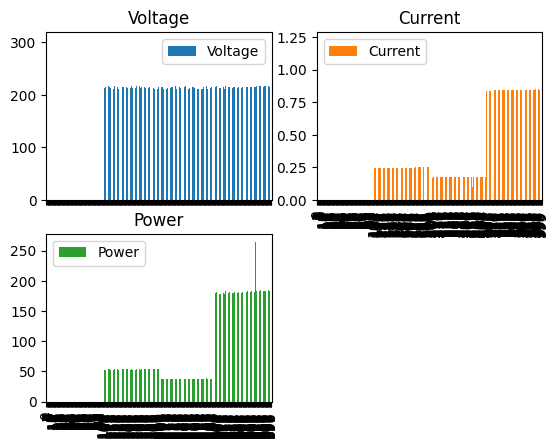

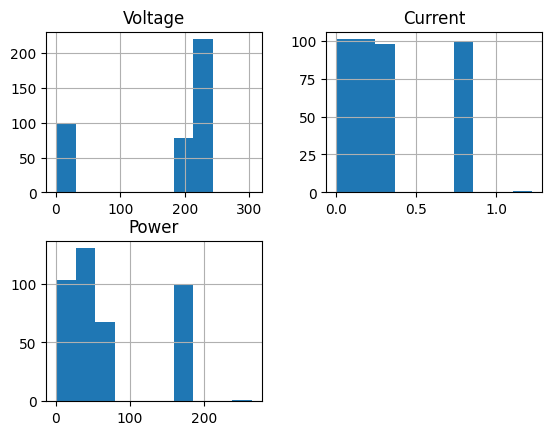

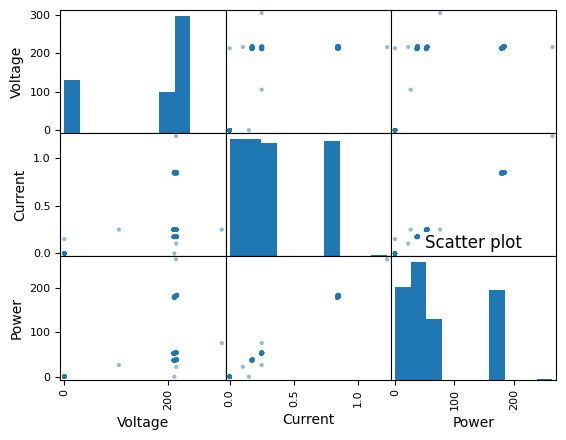

In [24]:
data.plot(kind='bar',subplots=True,layout=(2,2))
pyplot.title('Bar plot')
pyplot.show()

data.hist()
pyplot.title('Histogram')
pyplot.show()

scatter_matrix(data)
pyplot.title('Scatter plot')
pyplot.show()


In [25]:
#Evaluating various Machine learning algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [27]:
array=data.values
x=array[:,0:3]
y=array[:,3]
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)


In [37]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR: 0.996875 (0.009375)
LDA: 0.996875 (0.009375)
KNN: 0.993750 (0.018750)
CART: 0.993750 (0.018750)
NB: 0.990625 (0.020010)
SVM: 0.990625 (0.020010)


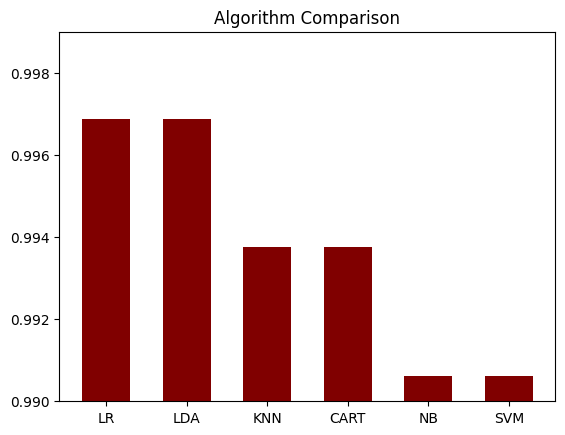

In [39]:
results=[]
names=[]
res=[]
for name,model in models:
  kfold=StratifiedKFold(n_splits=10,random_state=None)
  cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  print('%s: %f (%f)' % (name,cv_results.mean(),cv_results.std()))


pyplot.ylim(0.990, 0.999)
pyplot.bar(names,res,color='maroon',width=0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()

the best accuracy was observed in logistic regression and linear discriminant analysis model.